<a href="https://colab.research.google.com/github/Sujan21008043/Assessment-2/blob/main/Analyzedataedited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**:
The Australian Energy Dataset Analysis aims to evaluate various aspects of energy consumption across different states in Australia using Python and SQLite. The primary goal is to extract, clean, and analyze data to uncover insights into energy usage patterns by state, fuel type, and economic indicators such as Gross State Product (GSP). The analysis involves generating visualizations and performing calculations to interpret the relationships between energy consumption, fuel types, and economic productivity.

**Key Points of Analysis**:

* Total Energy Consumption by State
* Total Energy Consumption by Fuel Type
* Energy Consumption by Fuel Type for Each State
* Energy Intensity by State Annually

# **Detailed Algorithm or Pseudocode**
* Set Up the Environment:
Upload the 'AUS_energy_sqlite3.db' file and create a connection to the SQLite database using the SQLite3 library.
* Examine the Database Schema:
Retrieve the list of tables.
* Data Extraction and Manipulation:
Write SQL queries to extract relevant information from the main table:
Load data into a Pandas DataFrame.
* Clean and preprocess the data:
Handle missing values (e.g., fill missing values of Coal from NT state).
Drop unnecessary columns (there is none in our case).
* Develop an Algorithm:

Compute total energy consumption:
Sum the values of Coal, Oil, Gas, and Renewables for each state and year.

Compute total energy consumption by fuel type:
Sum the values of each fuel type across all states and years.

Compute energy intensity:
Calculate energy intensity as Total Energy Consumption (in GJ) divided by GSP (in $ million).

* Visualization and Output:

Analyze the relationship between total energy consumption and each state (Group A):
Plot a bar graph with states on the x-axis and total energy consumption (in PJ) on the y-axis.

Analyze the relationship between total energy consumption and fuel type (Group A):
Plot a pie chart showing the total energy consumption by each fuel type.

Analyze the relationship between total energy consumption for each state, broken down by fuel type (Group B):
Plot a stacked bar graph with states on the x-axis and energy consumption by each fuel type on the y-axis.

Analyze the relationship between energy intensity for each state annually (Group C):
Plot a line graph showing energy intensity (GJ/$ million GSP) for each state over the years.

* Interpretation and Conclusion:

VIC has the highest total energy consumption.

Coal is the most consumed fuel type.

WA shows the highest energy intensity.

# Retrieve Database

**Import Libraries**

pandas (pd): It provides data structures like DataFrames, which are excellent for handling and analyzing structured data.

numpy (np): It offers powerful mathematical functions that operate on these arrays, making it suitable for numerical data processing and computations.

matplotlib.pyplot (plt): It is a comprehensive library for generating plots, charts, and graphs, which are often useful in reports to visualize data trends and patterns.


In [404]:
# import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database

In [405]:
#connect to the database "AUS_energy_sqlite3" in sqlite3 library
conn = sqlite3.connect('AUS_energy_sqlite3.db')

In [406]:
#creates cursor # creates. works as a middleman between dabase and python
db_cursor = conn.cursor()

# Data Exploration
We will clean the raw data with below steps:
* Examining the Database: Identify the number of tables present and their respective names.
* Inspecting Data Structure: Determine the total number of records, the field names, and their data types.
* Identifying Problematic Data: Look for duplicates, incorrect formats, and missing values.
* Data Cleaning: Remove duplicate entries and eliminate any unsuitable data.

**Load the database into pandas dataframe**

In [407]:
#selects all the table from the sqlite_master table (it stoers the chema for the database)
db_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
# returns a list of tuples which contains the table name in variable 'tables' (retreive data)
tables = db_cursor.fetchall()
#prints the tables selected (to view the details)
print("Name of the table is : ", tables)
#close the connection
db_cursor.close()

Name of the table is :  [('AUS_energy',)]


# Data Filteration
**Checking the inside data of 'AUS_energy' table**

In [408]:
# creates cursor object to execute SQL queries against a database.
db_cursor = conn.cursor()
#select only 5 rows from from 'AUS_energy' table since the data is big
db_cursor.execute("SELECT * from AUS_energy LIMIT 5;")
# returns a list of tuples which contains the table name in rows variable(retreive data)
rows = db_cursor.fetchall()
# prints out the first 5 rows for AUS_energy table in data variable "rows"
print("First Five rows from AUS_energy table; ", rows)
# Closing the connection
db_cursor.close()

First Five rows from AUS_energy table;  [('2008-09', 'WA', 132.9, 294.3, 474.7, 15.6, 2240250, 244695), ('2008-09', 'NSW', 800.9, 587.5, 131.6, 54.7, 7408540, 530532), ('2008-09', 'VIC', 695.3, 432.9, 273.5, 33.6, 5371934, 368579), ('2008-09', 'QLD', 629.2, 469.5, 187.9, 77.4, 4328771, 284526), ('2008-09', 'SA', 80.2, 120.2, 134.0, 21.2, 1608902, 100174)]


**Now, we test our data for all the rows**

In [409]:
# creates cursor objerct to execute SQL queries against a database.
db_cursor = conn.cursor()
#select only 5 rows from from 'AUS_energy' table
db_cursor.execute("SELECT * from AUS_energy;") #removing the limit
# returns a list of tuples which contains the table name in db_cursor variable(retreive data)
rows = db_cursor.fetchall()

In [410]:
# prints out all the rows for AUS_energy table in data variable "rows"
print("Rows from AUS_energy table; ") #or print("Rows from AUS_energy table; ", tables)
# using for in loop to print the list in vertical way
for row in rows:
  print(row)
  #closing the cursor
db_cursor.close()

Rows from AUS_energy table; 
('2008-09', 'WA', 132.9, 294.3, 474.7, 15.6, 2240250, 244695)
('2008-09', 'NSW', 800.9, 587.5, 131.6, 54.7, 7408540, 530532)
('2008-09', 'VIC', 695.3, 432.9, 273.5, 33.6, 5371934, 368579)
('2008-09', 'QLD', 629.2, 469.5, 187.9, 77.4, 4328771, 284526)
('2008-09', 'SA', 80.2, 120.2, 134.0, 21.2, 1608902, 100174)
('2008-09', 'TAS', 12.4, 41.6, 11.2, 37.1, 504353, 28165)
('2008-09', 'NT', '', 54.8, 39.9, 0.4, 226027, 19562)
('2009-10', 'WA', 125.6, 290.0, 474.9, 14.6, 2290845, 259326)
('2009-10', 'NSW', 771.8, 638.9, 148.7, 63.8, 7506058, 539670)
('2009-10', 'VIC', 688.7, 448.4, 263.5, 36.0, 5461101, 372276)
('2009-10', 'QLD', 547.5, 466.9, 195.8, 107.4, 4404744, 290556)
('2009-10', 'SA', 79.7, 120.5, 119.5, 20.4, 1627322, 102303)
('2009-10', 'TAS', 11.5, 41.5, 13.6, 40.0, 508847, 28402)
('2009-10', 'NT', '', 51.9, 42.0, 0.5, 229778, 19469)
('2010-11', 'WA', 130.6, 341.5, 494.9, 15.3, 2353409, 271336)
('2010-11', 'NSW', 732.2, 685.0, 146.5, 68.6, 7586514, 55061

# View the Data Structure

In [411]:
#connect to the database "AUS_energy_sqlite3" in sqlite3 library
conn = sqlite3.connect("AUS_energy_sqlite3.db")

In [412]:
# works as a middleman between dabase and python
db_cursor = conn.cursor()

In [413]:
# already imported pandas as pd and we creating the dataframe
#creates a variable 'table_name' containing data of 'AUS_energy' as executed as pandas
table_name = 'AUS_energy'

In [414]:
#execute SQL query to fetch all the data from 'table_name' in Sqlite database and stoers in pandas dataFrame
df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)


In [415]:
# prints the result in DataFrame 'df'
print(df)

       Year State Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    WA     132.9     294.3     474.7             15.6     2240250   
1   2008-09   NSW     800.9     587.5     131.6             54.7     7408540   
2   2008-09   VIC     695.3     432.9     273.5             33.6     5371934   
3   2008-09   QLD     629.2     469.5     187.9             77.4     4328771   
4   2008-09    SA      80.2     120.2     134.0             21.2     1608902   
..      ...   ...       ...       ...       ...              ...         ...   
93  2021-22   VIC     410.7     410.0     237.5            105.2     6625964   
94  2021-22   QLD     485.6     504.7     305.7            143.0     5320496   
95  2021-22    SA      25.9     141.6      80.2             48.3     1821200   
96  2021-22   TAS       8.8      39.9       7.1             48.1      571013   
97  2021-22    NT                37.6     110.6              1.6      250219   

    GSP ($ million)  
0            2446

**Filtering and Checking the missing value the data,**

We are using the the codes like



1. df.isnull().sum()
2. pd.to_numeric(df['Coal (PJ)'], errors='coerce')
3. df['Coal (PJ)'].fillna(df['Coal (PJ)'].mean(), inplace=True)

to check the missing value, converting the object type to numeric type and filling the missing value with mean.

In [416]:
#counts the missing value
missing_values_count = df.isnull().sum()
#print missing values as'Missing values in each column of Aus_energy'
print(f"Missing values in each column of {table_name} table:" )
#print all the missing values
print(missing_values_count)


Missing values in each column of AUS_energy table:
Year               0
State              0
Coal (PJ)          0
Oil (PJ)           0
Gas (PJ)           0
Renewables (PJ)    0
Population         0
GSP ($ million)    0
dtype: int64


**Since it shows '0' missing value. Let's try checking the data type**


In [417]:
# check data type of each column in pandas dataFrame 'df'
df.dtypes

Year                object
State               object
Coal (PJ)           object
Oil (PJ)           float64
Gas (PJ)           float64
Renewables (PJ)    float64
Population           int64
GSP ($ million)      int64
dtype: object

Since 'Coal' is shown as 'object'. We will considered that missing value is there in Coal(PJ).  Hence we will convert it to float type and check the missing value.

In [418]:
# checking and printing the total column in 'AUS_energy' . We know the column name as'Coal (PJ)'
print('Total columns in AUS_energy table :', df.columns)

Total columns in AUS_energy table : Index(['Year', 'State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)',
       'Population', 'GSP ($ million)'],
      dtype='object')


# Checking missing value in 'Coal(PJ)' before changing it to float type

In [419]:
#checking if the 'Coal' column contains missing value or not
missing_values_count = df['Coal (PJ)'].isnull().sum()
print(f"Missing values in Coal (PJ) column: {missing_values_count}")


Missing values in Coal (PJ) column: 0


In [420]:
#prints first five
print(df['Coal (PJ)'].head())

0    132.9
1    800.9
2    695.3
3    629.2
4     80.2
Name: Coal (PJ), dtype: object


As we can see that it shows the missing value as '0'. Hence we will try to convert it to number.


In [421]:
# converts Coal(PJ) column from 'object type' to 'numeric type'in DataFrame 'df'
df['Coal (PJ)'] = pd.to_numeric(df['Coal (PJ)'], errors='coerce') #errors='coerce' convert non-numeric value as 'NaN'

In [422]:
#checking missing value in 'Coal(PJ) after changing to float type
missing_value_coals = df['Coal (PJ)'].isnull().sum()
print('Missing value in Coals (PJ) :', missing_value_coals)

Missing value in Coals (PJ) : 14


# Replacing the missing value

Since we found that the 14 missing value lies in 'Coals (PJ), we will replace the missing value with the mean. We are replacing with the mean as the visualization will be near to the accurate and also the filling of missing values with the mean does not change the central tendency of the data set. It does not alter the overall distribution.

In [440]:
# Replace missing values with the mean of the column
df['Coal (PJ)'].fillna(df['Coal (PJ)'].mean(), inplace=True)


In [441]:
#prints the 20 list of column 'Coal (PJ)to check missing value is addded or not
print(df['Coal (PJ)'].head(6))


0    132.9
1    800.9
2    695.3
3    629.2
4     80.2
5     12.4
Name: Coal (PJ), dtype: float64


In [442]:
import pandas as pd

# Filter the DataFrame to include only rows where 'Coal (PJ)' is not null
coal_df = df[df['Coal (PJ)'].notnull()]

# Display the first 5 rows of the filtered DataFrame
print(coal_df.head(100))



       Year State   Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  \
0   2008-09    WA  132.900000     294.3     474.7             15.6   
1   2008-09   NSW  800.900000     587.5     131.6             54.7   
2   2008-09   VIC  695.300000     432.9     273.5             33.6   
3   2008-09   QLD  629.200000     469.5     187.9             77.4   
4   2008-09    SA   80.200000     120.2     134.0             21.2   
..      ...   ...         ...       ...       ...              ...   
93  2021-22   VIC  410.700000     410.0     237.5            105.2   
94  2021-22   QLD  485.600000     504.7     305.7            143.0   
95  2021-22    SA   25.900000     141.6      80.2             48.3   
96  2021-22   TAS    8.800000      39.9       7.1             48.1   
97  2021-22    NT  320.796429      37.6     110.6              1.6   

    Population  GSP ($ million)  Total Energy Consumption  \
0      2240250           244695                917.500000   
1      7408540           530532      

**Rechecking the missing value after adding the mean**

In [443]:
#print all the details of missing value, object type in AUS_energy table
missing_values_count = df['Coal (PJ)'].isnull().sum()
print(f"Missing values in Coal (PJ) column: {missing_values_count}")
print(f"Missing values in each column of {table_name} table:")
print(missing_values_count)

Missing values in Coal (PJ) column: 0
Missing values in each column of AUS_energy table:
0


Mean value before and after replacement

In [444]:
mean_coal_before = df['Coal (PJ)'].mean()  # Mean before replacement
print(f"Mean of Coal (PJ) column before replacement: {mean_coal_before}")

# Replace missing values
df['Coal (PJ)'].fillna(mean_coal_before, inplace=True)

mean_coal_after = df['Coal (PJ)'].mean()  # Mean after replacement
print(f"Mean of Coal (PJ) column after replacement: {mean_coal_after}")


Mean of Coal (PJ) column before replacement: 320.7964285714286
Mean of Coal (PJ) column after replacement: 320.7964285714286


**Describing the table**
Describing the statistical data of the table

In [445]:
#describe statistics of the DataFrame
df.describe()

,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million),Total Energy Consumption,Per Capita Energy Consumption (GJ),Energy Intensity
count,98.000000,98.000000,98.000000,98.000000,9.800000e+01,98.000000,98.000000,98.000000,98.000000
mean,320.796429,317.653061,204.587755,51.580612,3.424330e+06,266337.000000,894.617857,0.472143,5.531391
std,251.308427,229.318224,179.205651,38.383143,2.769970e+06,209376.485897,556.181847,0.540730,5.553778
min,8.100000,33.400000,6.600000,0.400000,2.260270e+05,19469.000000,97.100000,0.156856,1.915714
25%,63.825000,54.350000,81.675000,24.025000,5.502752e+05,33440.000000,341.975000,0.194125,2.877059
50%,320.796429,379.100000,144.700000,42.500000,2.548325e+06,301927.000000,1095.250000,0.234793,3.405562
75%,552.525000,507.675000,263.600000,72.600000,5.622772e+06,390060.250000,1436.275000,0.410477,4.188395
max,800.900000,687.400000,692.600000,143.000000,8.622575e+06,706003.000000,1632.300000,1.888616,21.326027


# Data Analysis

Since we filled up all the missing values and checked the dataset, we will now proceed to work on given problems:

Group A:

1. Compute and visualize the total energy consumption for each state.

2. Compute and visualize the total energy consumption by fuel type.

Group B:

1. Analyse and visualize the total energy consumption for each state, broken down by fuel type.

Group C:

1. Analyse the energy intensity, defined as energy consumption per unit of GSP, for each state annually and chart these figures.


# Group A:

Compute and visualize the total energy consumption for each state.

1. Computing Total energy consumption and total energy consumption by state
# **Analysing and Visualizing**
Group A

Calculating Total energy consumption for each state

Here, we use the df.groupby ('State') ['Total Energy Consumption'].sum() because we are calculating the sum of energy of every state
The reason for using the groupby function here is that we want to perform a calculation (in this case, a sum) separately for each state. The groupby function is a powerful tool for this kind of operation because it allows us to specify how to split the data into groups, and then apply a function to each group independently.

The sum function is used here because we want to know the total energy consumption for each state. By summing the ‘Total Energy Consumption’ for each group, we get a clear picture of the total energy usage in each state.

As for why we didn’t use a pivot table or other methods, it’s because the groupby method is more straightforward and efficient for this specific task. A pivot table might be more useful if we wanted to reshape the data or calculate more complex statistics, but for simply summing a column within groups, groupby and sum are the most direct and efficient methods.

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [448]:
# Compute the total energy consumption for each state
# create a new column 'Total Consumption' in DataFrame 'df'with sum of the energy consumption across all fuel types (Coal, Oil, Gas, Renewables)
df['Total Energy Consumption'] = df['Coal (PJ)'] + df['Oil (PJ)'] + df['Gas (PJ)'] + df['Renewables (PJ)']

In [449]:
#groups the data by 'state' and add the data to get 'Total Energy Consumption' and is saved in variable ' state_energy_consumption'
state_energy_consumption = df.groupby('State')['Total Energy Consumption'].sum()

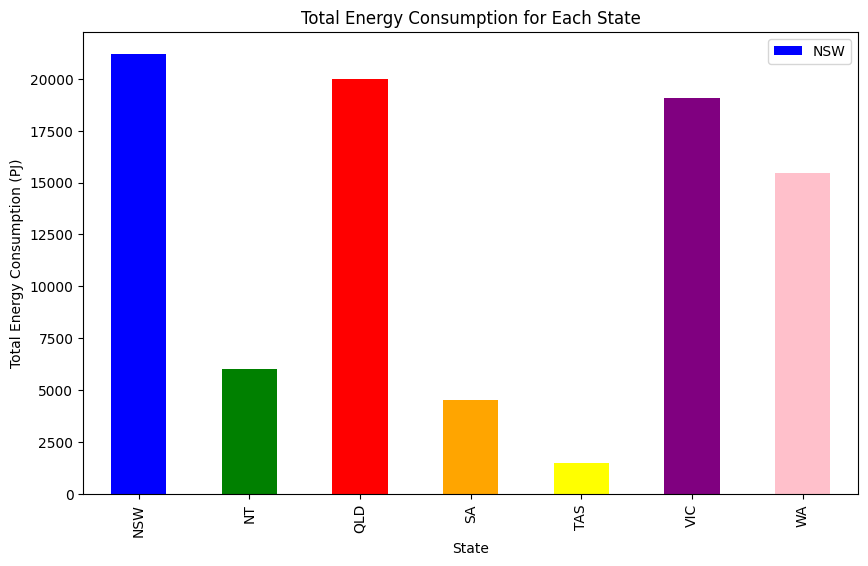

In [450]:

# plot the total energy consumption for each state
plt.figure(figsize=(10, 6))
state_energy_consumption.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'yellow', 'purple', 'pink'])
plt.legend(['NSW', 'Northern Teritory(NT)', 'Queensland(QLD)', 'South Australia(SA)', 'Tasmania(TAS)', 'Victoria(VIC)', 'Western Australia(WA)'])
plt.title('Total Energy Consumption for Each State')
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.show()

# Close the connection
conn.close()




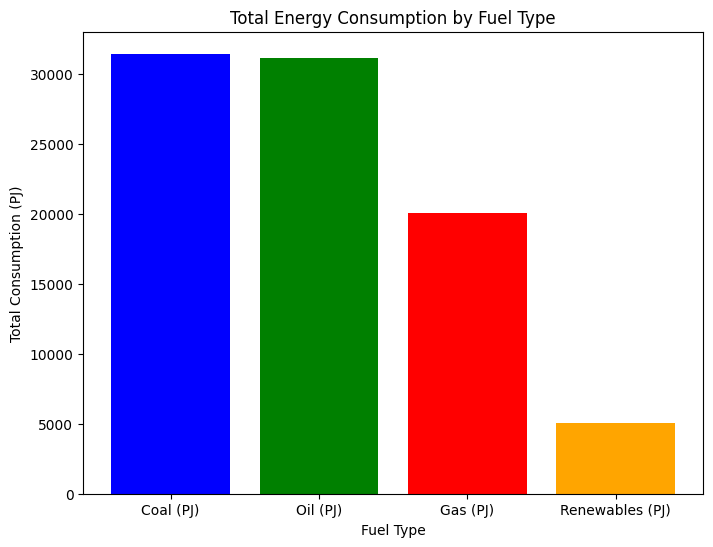

In [429]:
# Compute the total energy consumption by fuel type
# Sum the energy consumption for each fuel type (Coal, Oil, Gas, Renewables) across all states and years
total_coal_consumption = df['Coal (PJ)'].sum()
total_oil_consumption = df['Oil (PJ)'].sum()
total_gas_consumption = df['Gas (PJ)'].sum()
total_renewables_consumption = df['Renewables (PJ)'].sum()

# Create a dictionary with the total consumption for each fuel type
total_consumption_by_fuel_type = {
    'Coal (PJ)': total_coal_consumption,
    'Oil (PJ)': total_oil_consumption,
    'Gas (PJ)': total_gas_consumption,
    'Renewables (PJ)': total_renewables_consumption
}

# Convert the dictionary to a DataFrame for plotting
fuel_type_df = pd.DataFrame(list(total_consumption_by_fuel_type.items()), columns=['Fuel Type', 'Total Consumption (PJ)'])

# Plot the total energy consumption by fuel type
plt.figure(figsize=(8, 6))
plt.bar(fuel_type_df['Fuel Type'], fuel_type_df['Total Consumption (PJ)'], color=['blue', 'green', 'red', 'orange'])
plt.title('Total Energy Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Total Consumption (PJ)')
plt.show()

# Close the database connection
conn.close()

<Figure size 1000x600 with 0 Axes>

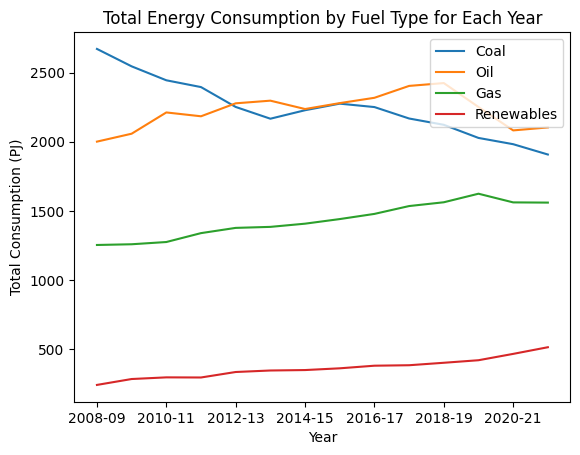

In [430]:


# Compute the total energy consumption for each fuel type for each year
# Group the data by 'Year' and sum the energy consumption for each fuel type
yearly_energy_consumption = df.groupby('Year').agg({
    'Coal (PJ)': 'sum',
    'Oil (PJ)': 'sum',
    'Gas (PJ)': 'sum',
    'Renewables (PJ)': 'sum'
})

# Plot the total energy consumption for each fuel type for each year
plt.figure(figsize=(10, 6))
yearly_energy_consumption.plot(kind='line')
plt.title('Total Energy Consumption by Fuel Type for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Consumption (PJ)')
plt.legend(['Coal', 'Oil', 'Gas', 'Renewables'])
plt.show()

# Close the database connection
conn.close()


<Figure size 1400x800 with 0 Axes>

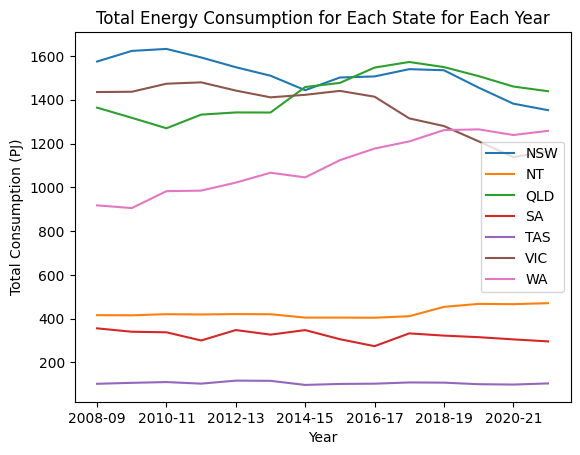

In [431]:
# Compute the total energy consumption for each state for each year
# Create a new column 'Total Energy Consumption' by summing up the energy consumption across fuel types
df['Total Energy Consumption'] = df['Coal (PJ)'] + df['Oil (PJ)'] + df['Gas (PJ)'] + df['Renewables (PJ)']

# Group the data by 'State' and 'Year' and compute the total energy consumption
state_yearly_energy_consumption = df.groupby(['State', 'Year'])['Total Energy Consumption'].sum().unstack()

# Plot the total energy consumption for each state for each year
plt.figure(figsize=(14, 8))
state_yearly_energy_consumption.T.plot(kind='line')
plt.title('Total Energy Consumption for Each State for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Consumption (PJ)')
plt.legend(loc='best')
plt.show()

# Close the database connection
conn.close()


GROUP B Analyse the per capita energy consumption for each state for each year and create a
corresponding visualization.

<Figure size 1400x800 with 0 Axes>

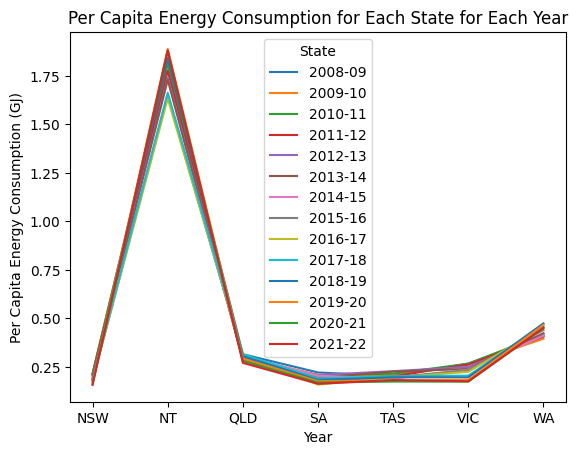

In [432]:

# Compute the total energy consumption for each record
df['Total Energy Consumption'] = df['Coal (PJ)'] + df['Oil (PJ)'] + df['Gas (PJ)'] + df['Renewables (PJ)']

# Compute the per capita energy consumption for each state for each year
df['Per Capita Energy Consumption (GJ)'] = df['Total Energy Consumption'] * 1000 / df['Population']  # Converting PJ to GJ

# Group data by 'State' and 'Year' and compute the mean per capita energy consumption
state_yearly_per_capita = df.groupby(['State', 'Year'])['Per Capita Energy Consumption (GJ)'].mean()

# Plot the per capita energy consumption for each state for each year
plt.figure(figsize=(14, 8))
state_yearly_per_capita.unstack().plot(kind='line')
plt.title('Per Capita Energy Consumption for Each State for Each Year')
plt.xlabel('Year')
plt.ylabel('Per Capita Energy Consumption (GJ)')
plt.legend(title='State', loc='best')
plt.show()

# Close the database connection
conn.close()

GROUP C OPTION 8

In [433]:
df['Total Energy Consumption'] = df['Coal (PJ)'] + df['Oil (PJ)'] + df['Gas (PJ)'] + df['Renewables (PJ)']

In [434]:
df['Energy Intensity'] = df['Total Energy Consumption'] * 1000 / df['GSP ($ million)']  # Convert PJ to GJ and divide by GSP

<Figure size 1600x1000 with 0 Axes>

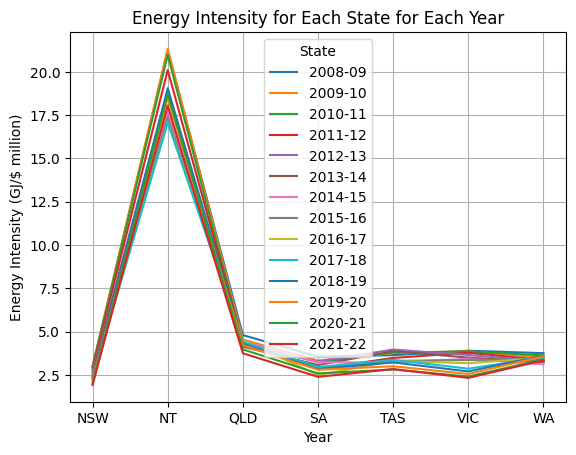

In [435]:
import matplotlib.pyplot as plt

# Group data by 'State' and 'Year' and compute the mean energy intensity
state_yearly_energy_intensity = df.groupby(['State', 'Year'])['Energy Intensity'].mean()

# Plot the energy intensity for each state for each year
plt.figure(figsize=(16, 10))
#creates a line plot of data in 'state_yearly_energy_intensity'
state_yearly_energy_intensity.unstack().plot(kind='line')
#plot title of the figure 'Energy Intensity for Each State for Each Year
plt.title('Energy Intensity for Each State for Each Year')
#plot x-axis as'Year'
plt.xlabel('Year')
#plot y-axis as 'Energy Intensity (GJ/$ million)'
plt.ylabel('Energy Intensity (GJ/$ million)')
#plot legend with title 'State' in the best location automatically
plt.legend(title='State', loc='best')
plt.grid(True) # Enable grid lines
# Display the plot
plt.show()

# Close the database connection
conn.close()

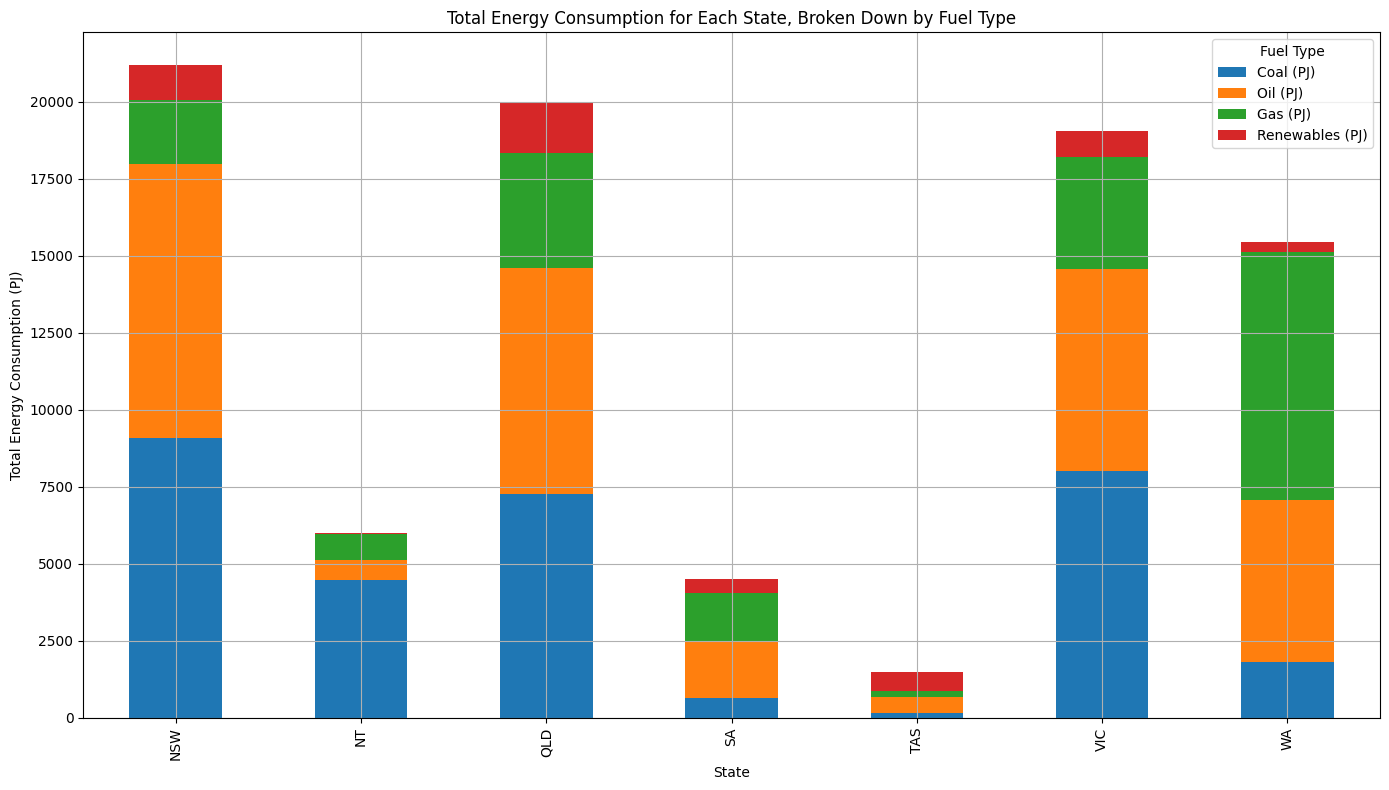

In [436]:


# Compute the total energy consumption by state and fuel type
state_fuel_consumption = df.groupby('State')[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum()

# Plotting the stacked bar chart
state_fuel_consumption.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Total Energy Consumption for Each State, Broken Down by Fuel Type')
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()
